# World_Happiness

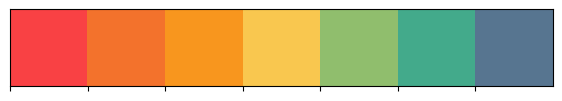

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns

#Colors to be used in the plots
color=["#f94144","#f3722c","#f8961e","#f9c74f","#90be6d","#43aa8b","#577590"]
sns.palplot(color)

In [72]:
df = pd.read_csv('2022.csv')

In [73]:
df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   RANK                                        147 non-null    int64 
 1   Country                                     147 non-null    object
 2   Happiness score                             146 non-null    object
 3   Whisker-high                                146 non-null    object
 4   Whisker-low                                 146 non-null    object
 5   Dystopia (1.83) + residual                  146 non-null    object
 6   Explained by: GDP per capita                146 non-null    object
 7   Explained by: Social support                146 non-null    object
 8   Explained by: Healthy life expectancy       146 non-null    object
 9   Explained by: Freedom to make life choices  146 non-null    object
 10  Explained by: Generosity  

In [85]:
df.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [86]:
df.rename(columns={'Happiness score': 'HappinessScore', 'Dystopia (1.83) + residual': 'DystopiaResidual',
                  'Explained by: GDP per capita':'GDPPerCapita',
                   'Explained by: Social support':'SocialSupport',
                   'Explained by: Healthy life expectancy':'HealthyLifeExpectancy',
                   'Explained by: Freedom to make life choices':'FreedomtoMakeLifeChoices',
                   'Explained by: Generosity':'Generosity',
                   'Explained by: Perceptions of corruption':'PerceptionsofCorruption'
                  }, inplace=True)

In [87]:
df.columns

Index(['RANK', 'Country', 'HappinessScore', 'Whisker-high', 'Whisker-low',
       'DystopiaResidual', 'GDPPerCapita', 'SocialSupport',
       'HealthyLifeExpectancy', 'FreedomtoMakeLifeChoices', 'Generosity',
       'PerceptionsofCorruption'],
      dtype='object')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RANK                      147 non-null    int64  
 1   Country                   147 non-null    object 
 2   HappinessScore            147 non-null    float64
 3   Whisker-high              146 non-null    object 
 4   Whisker-low               146 non-null    object 
 5   DystopiaResidual          146 non-null    object 
 6   GDPPerCapita              146 non-null    object 
 7   SocialSupport             146 non-null    object 
 8   HealthyLifeExpectancy     146 non-null    object 
 9   FreedomtoMakeLifeChoices  146 non-null    object 
 10  Generosity                146 non-null    object 
 11  PerceptionsofCorruption   146 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 13.9+ KB


In [75]:
df['Happiness score']=df['Happiness score'].str.replace(',','.')
df['Happiness score']=df['Happiness score'].astype(float)
df['Happiness score'].fillna(df['Happiness score'].mean(),inplace=True)

In [89]:
df['Whisker-high']=df['Whisker-high'].str.replace(',','.')
df['Whisker-high']=df['Whisker-high'].astype(float)
df['Whisker-high'].fillna(df['Whisker-high'].mean(),inplace=True)

df['Whisker-low']=df['Whisker-low'].str.replace(',','.')
df['Whisker-low']=df['Whisker-low'].astype(float)
df['Whisker-low'].fillna(df['Whisker-low'].mean(),inplace=True)

df['DystopiaResidual']=df['DystopiaResidual'].str.replace(',','.')
df['DystopiaResidual']=df['DystopiaResidual'].astype(float)
df['DystopiaResidual'].fillna(df['DystopiaResidual'].mean(),inplace=True)

df['GDPPerCapita']=df['GDPPerCapita'].str.replace(',','.')
df['GDPPerCapita']=df['GDPPerCapita'].astype(float)
df['GDPPerCapita'].fillna(df['GDPPerCapita'].mean(),inplace=True)

df['SocialSupport']=df['SocialSupport'].str.replace(',','.')
df['SocialSupport']=df['SocialSupport'].astype(float)
df['SocialSupport'].fillna(df['SocialSupport'].mean(),inplace=True)

df['HealthyLifeExpectancy']=df['HealthyLifeExpectancy'].str.replace(',','.')
df['HealthyLifeExpectancy']=df['HealthyLifeExpectancy'].astype(float)
df['HealthyLifeExpectancy'].fillna(df['HealthyLifeExpectancy'].mean(),inplace=True)

df['FreedomtoMakeLifeChoices']=df['FreedomtoMakeLifeChoices'].str.replace(',','.')
df['FreedomtoMakeLifeChoices']=df['FreedomtoMakeLifeChoices'].astype(float)
df['FreedomtoMakeLifeChoices'].fillna(df['FreedomtoMakeLifeChoices'].mean(),inplace=True)

df['Generosity']=df['Generosity'].str.replace(',','.')
df['Generosity']=df['Generosity'].astype(float)
df['Generosity'].fillna(df['Generosity'].mean(),inplace=True)

df['PerceptionsofCorruption']=df['PerceptionsofCorruption'].str.replace(',','.')
df['PerceptionsofCorruption']=df['PerceptionsofCorruption'].astype(float)
df['PerceptionsofCorruption'].fillna(df['PerceptionsofCorruption'].mean(),inplace=True)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RANK                      147 non-null    int64  
 1   Country                   147 non-null    object 
 2   HappinessScore            147 non-null    float64
 3   Whisker-high              147 non-null    float64
 4   Whisker-low               147 non-null    float64
 5   DystopiaResidual          147 non-null    float64
 6   GDPPerCapita              147 non-null    float64
 7   SocialSupport             147 non-null    float64
 8   HealthyLifeExpectancy     147 non-null    float64
 9   FreedomtoMakeLifeChoices  147 non-null    float64
 10  Generosity                147 non-null    float64
 11  PerceptionsofCorruption   147 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 13.9+ KB


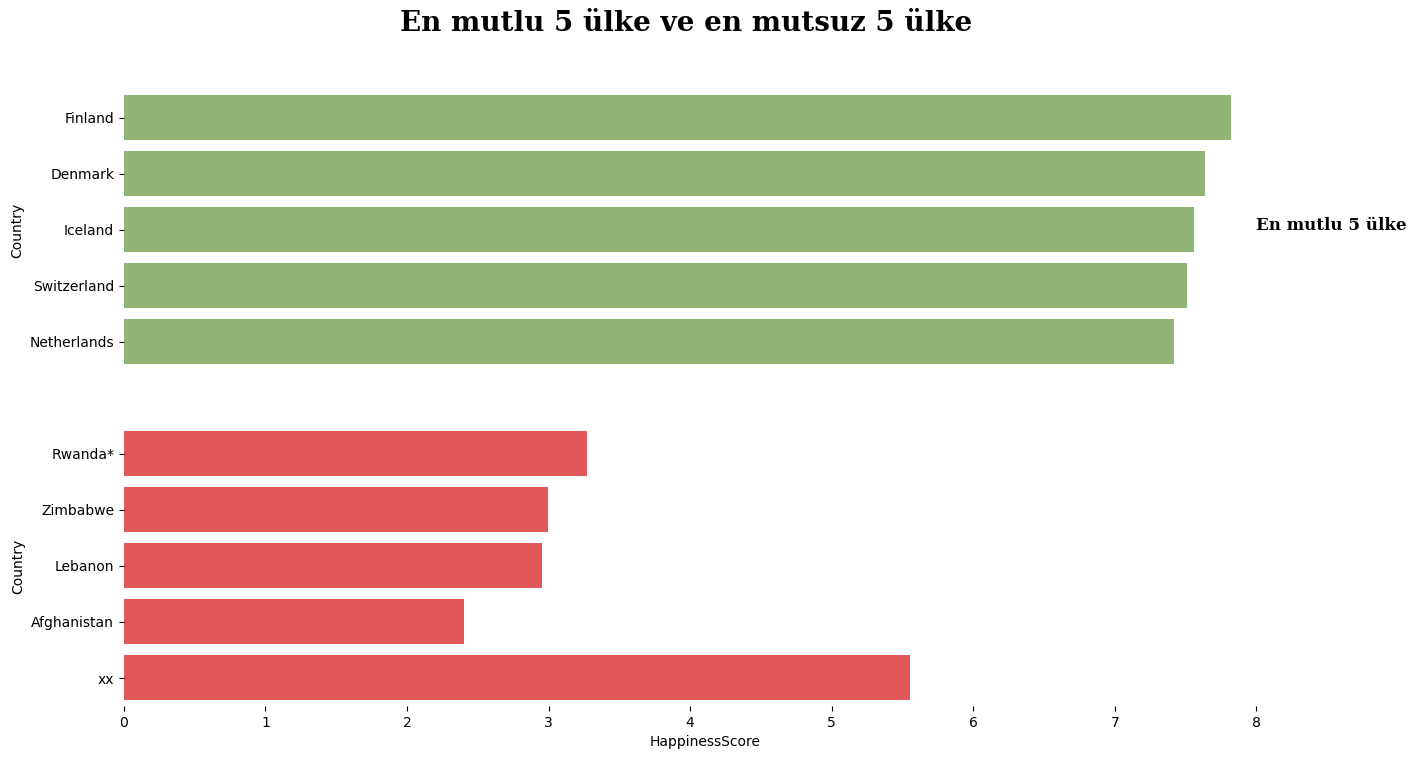

In [94]:
#top 5 and bottom 5 countries in 2021 report
fig= plt.figure(figsize=(15,8))
g=gs.GridSpec(ncols=1, nrows=2, figure=fig)
plt.suptitle("En mutlu 5 ülke ve en mutsuz 5 ülke", family='Serif', weight='bold', size=20)
ax1=plt.subplot(g[0,0])

top_5=df.head(5)
bot_5= df.tail(5)
ax1=sns.barplot(data=top_5, x=top_5['HappinessScore'],y=top_5['Country'], color=color[4])
#ax1.set_xlabel('')
ax1.xaxis.set_visible(False)
ax1.annotate("En mutlu 5 ülke",xy=(8,2), family='Serif', weight='bold', size=12)
ax2=plt.subplot(g[1,0], sharex=ax1)
ax2=sns.barplot(data=bot_5, x=bot_5['HappinessScore'],y=bot_5['Country'], color=color[0])
ax2.annotate("",xy=(8,2), family='Serif', weight='bold', size=12)
for s in ['left','right','top','bottom']:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

# Modeling

In [95]:
from sklearn.linear_model import LinearRegression #SKLEARN = Science Kit Learn
from sklearn.model_selection import train_test_split

In [100]:
x = df.drop(['Country','HappinessScore'], axis=1)
y = df.HappinessScore

In [101]:
x.shape,y.shape

((147, 10), (147,))

In [102]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)

In [103]:
from sklearn.linear_model import ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score

In [106]:
def algo_test(x, y):
    
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR = ExtraTreeRegressor()
    GBR = GradientBoostingRegressor()
    XGBC = XGBRegressor()
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=13)
    
    algos = [L, E, R, Lass, ETR, GBR, XGBC]
    algo_names= ['Linear', 'ElasticNet', 'Ridge', 'Lasso', 'Extra Tree', 'Gradient Boosting', 'XGBRegressor']
    r_squared = []
    rmse = []
    mae = []
    
    result = pd.DataFrame(columns = ['R_Squared', 'RMSE', 'MAE'],
                           index = algo_names)
    
    for algo in algos:
        algo.fit(X_train, y_train)
        algo.predict(X_test)
        
        r_squared.append(r2_score(y_test, algo.predict(X_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(X_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(X_test)))
        
    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE = mae
    
    return result.sort_values('R_Squared', ascending=False)

In [107]:
algo_test(x, y)

,R_Squared,RMSE,MAE
Linear,1.000000,0.000336,0.000273
Ridge,0.999880,0.012784,0.009087
Gradient Boosting,0.998273,0.048585,0.033674
XGBRegressor,0.994645,0.085562,0.066884
Extra Tree,0.990512,0.113887,0.073233
ElasticNet,0.968730,0.206755,0.129733
Lasso,0.967987,0.209196,0.125558
